# Stream Data Analysis

Write a Python program that will take the pizza customers dataset as input and produce the clusters which represents the customer segments present in the dataset. 
- You may like to do some preprocessing on the given dataset. 
- You have to write your own code matching to the problem statement. 
- Add comments at appropriate place so that it’s easy to understand your thought process.
- You are supposed to use k-means clustering algorithm (custom implementation not from 
any library) for customer segmentations. 
- The program should clearly output the cluster number, centroid used and number of records 
belonging to that cluster.
- The  final  clusters  should  be  preserved  in  such  a  way  that  it  can  be  used  in  following 
exercises.

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [34]:
data = pd.read_csv('pizza_customers.csv')
data['age_group'] = pd.cut(x=data['Age'], bins=[0,20, 39, 59, 99], labels=['0-20', '20-40', '40-60', '60+'])
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_group
count,200.000000,200,200.000000,200.000000,200.000000,200
unique,NaN,2,NaN,NaN,NaN,4
top,NaN,Female,NaN,NaN,NaN,20-40
freq,NaN,112,NaN,NaN,NaN,99
mean,100.500000,NaN,38.850000,60.560000,50.200000,NaN
std,57.879185,NaN,13.969007,26.264721,25.823522,NaN
min,1.000000,NaN,18.000000,15.000000,1.000000,NaN
25%,50.750000,NaN,28.750000,41.500000,34.750000,NaN
50%,100.500000,NaN,36.000000,61.500000,50.000000,NaN
75%,150.250000,NaN,49.000000,78.000000,73.000000,NaN


In [42]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_group
0,1,Male,19,15,39,0-20
1,2,Male,21,15,81,20-40
2,3,Female,20,16,6,0-20
3,4,Female,23,16,77,20-40
4,5,Female,31,17,40,20-40
...,...,...,...,...,...,...
195,196,Female,35,120,79,20-40
196,197,Female,45,126,28,40-60
197,198,Male,32,126,74,20-40
198,199,Male,32,137,18,20-40


<AxesSubplot:xlabel='Gender', ylabel='Age'>

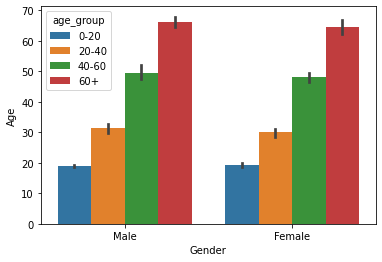

In [35]:
sns.barplot(data=data, y='Age', x='Gender',hue="age_group")

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

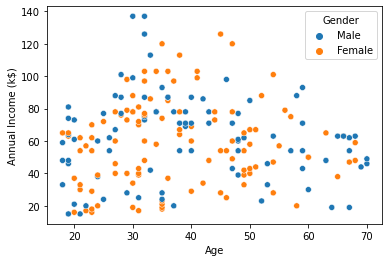

In [36]:
sns.scatterplot(data=data,y='Annual Income (k$)', x='Age',hue="Gender")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

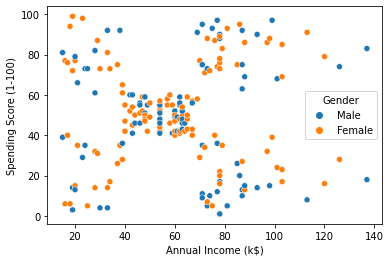

In [37]:
sns.scatterplot(data=data,y='Spending Score (1-100)', x='Annual Income (k$)',hue="Gender")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

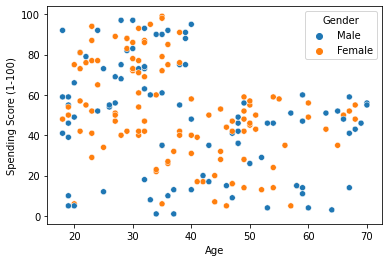

In [38]:
sns.scatterplot(data=data,y='Spending Score (1-100)', x='Age',hue="Gender")

In [47]:
def kmeans(X,k=3,max_iterations=10000):
    '''
    X: multidimensional data
    k: number of clusters
    max_iterations: number of repetitions before clusters are established
    
    Steps:
    1. Convert data to numpy aray
    2. Pick indices of k random point without replacement
    3. Find class (P) of each data point using euclidean distance
    4. Stop when max_iteration are reached of P matrix doesn't change
    
    Return:
    np.array: containg class of each data point
    '''
    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    for _ in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
    return P

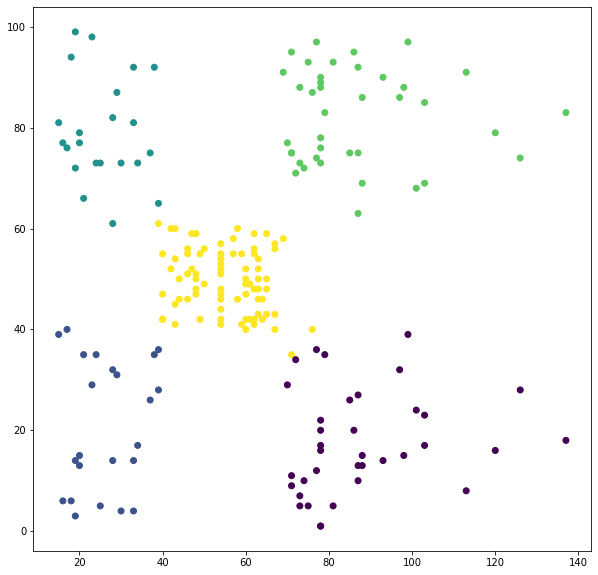

In [48]:
X = data.iloc[:, [3, 4]].values
sc = StandardScaler()
X_new = sc.fit_transform(X)
p= kmeans(X_new,k=5)
assert p.shape == (len(X),)
X_transformed = sc.inverse_transform(X_new)
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=p)
plt.show()